# Mushroom Classification using ML

Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [94]:
# Load the mushrooms dataset

df= pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [95]:
# show 10 row in the top

df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [96]:
#shape of the data

df.shape

(8124, 23)

so we have total 8124 rows and 23 columns in our mushroom datasets

In [97]:
#Lets find out the columns name 

df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

here we findout the all columns names in our datasets

In [98]:
# get data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [99]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

datasets does not have any null values

In [100]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All columns in dataset has oject datatype, hence before proceeding ahead we need to change the datatype.

In [101]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

"Veil-type" column only contains 1 unique value hence we can drop the column.

In [102]:
df.drop("veil-type", axis =1 , inplace =True)

'veil-type' column is dropped because single categiry wont give any impact

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df:
    df[column] = le.fit_transform(df[column])

In [104]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


After performing label encoder technique data is converted in numrical type. Let us check the datatype

In [105]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

now all datatyper integer format

In [106]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


As data is converted in interger format let us do some statistic of the data

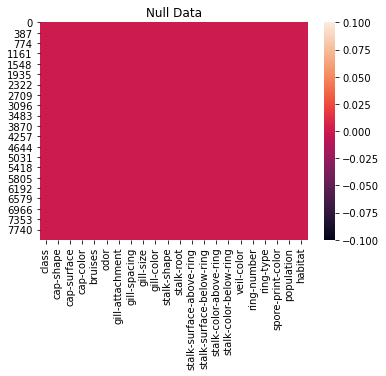

In [107]:
sns.heatmap(df.isnull())
plt.title("Null Data")
plt.show()

As we have already check data does not have any null value.

In [108]:
df["class"].unique()

array([1, 0])

There are two unique values are present in our target columns(class)...here 1 stands for poison and 0 stand for Edible

In [109]:
df["class"].value_counts()

0    4208
1    3916
Name: class, dtype: int64

here 4208--->Edible  and 3916--->Poison

<AxesSubplot:xlabel='class', ylabel='count'>

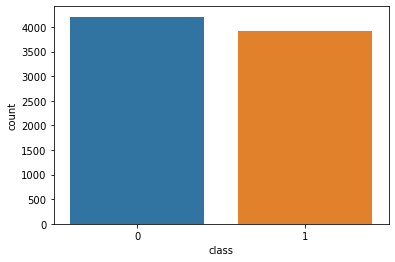

In [110]:
#visualization of the data

sns.countplot(df["class"])

in countplot we can see that datasets are not purely balanced but still not required to balace because the two classes are almost same 

In [111]:
#checking correlation with each other

cor=df.corr()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


Correlation of the columns with the target columns

<AxesSubplot:>

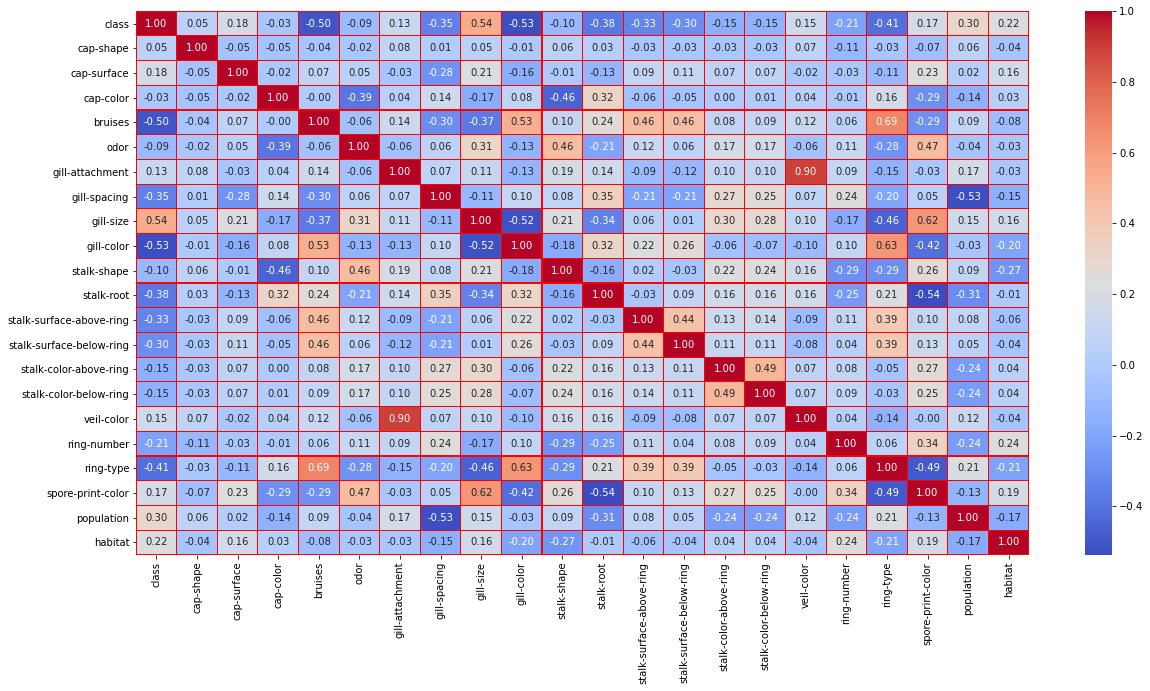

In [112]:
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True , cmap='coolwarm' ,linewidths=0.1, linecolor="Red" ,fmt="0.2f")

 The Reddish sides are highly correlated.Class is negatively correlated with bruises and gill-color, and its positively correlated with gill-size.

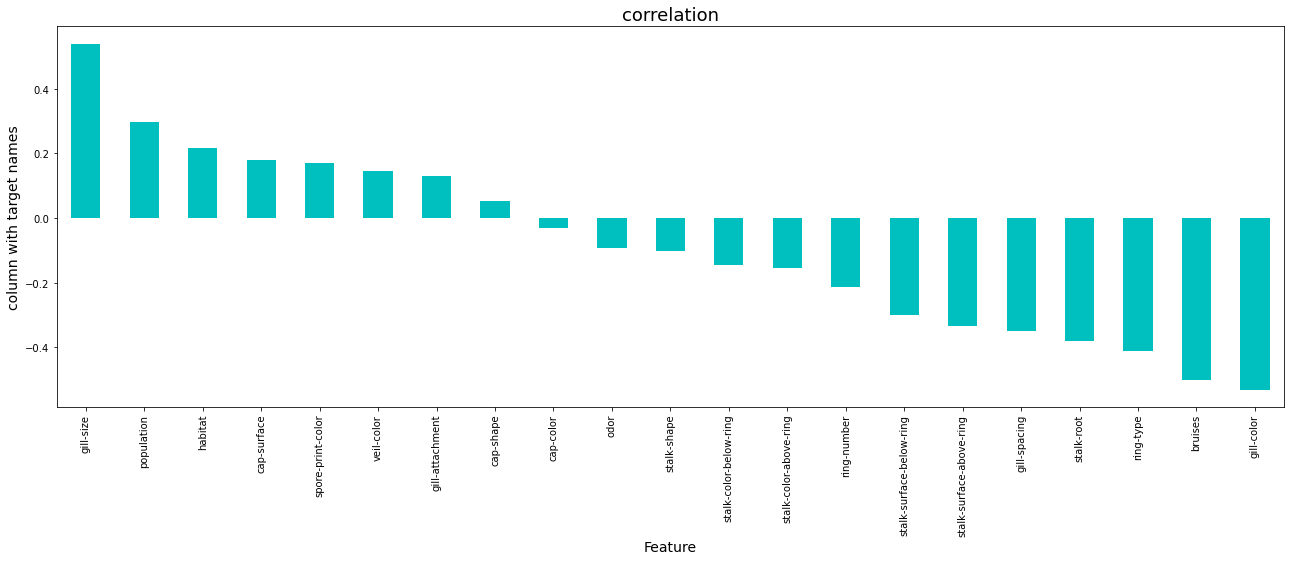

In [113]:
plt.figure(figsize=(22,7))
df.corr()['class'].sort_values(ascending=False).drop(['class']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Checking the columns which are positively and negative correlated with the target columns.

class                         AxesSubplot(0.125,0.808774;0.0731132x0.0712264)
cap-shape                   AxesSubplot(0.212736,0.808774;0.0731132x0.0712...
cap-surface                 AxesSubplot(0.300472,0.808774;0.0731132x0.0712...
cap-color                   AxesSubplot(0.388208,0.808774;0.0731132x0.0712...
bruises                     AxesSubplot(0.475943,0.808774;0.0731132x0.0712...
odor                        AxesSubplot(0.563679,0.808774;0.0731132x0.0712...
gill-attachment             AxesSubplot(0.651415,0.808774;0.0731132x0.0712...
gill-spacing                AxesSubplot(0.739151,0.808774;0.0731132x0.0712...
gill-size                   AxesSubplot(0.826887,0.808774;0.0731132x0.0712...
gill-color                    AxesSubplot(0.125,0.723302;0.0731132x0.0712264)
stalk-shape                 AxesSubplot(0.212736,0.723302;0.0731132x0.0712...
stalk-root                  AxesSubplot(0.300472,0.723302;0.0731132x0.0712...
stalk-surface-above-ring    AxesSubplot(0.388208,0.723302;0.0731

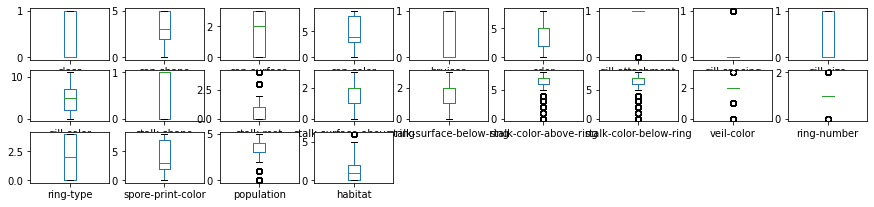

In [114]:
df.plot(kind='box', subplots=True, layout=(9,9), figsize=(15,10))

here we can observed that there are all categorical data so ,no needed to remove outliers and skewness from categorical data 

In [115]:
x=df.drop(columns=['class'])
y=df['class']

In [116]:
x.shape

(8124, 21)

In [117]:
y.shape

(8124,)

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [119]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    Lr=LogisticRegression()
    Lr.fit(x_train,y_train)
    pred=Lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.9649230769230769  on Random State  21


We have found best random_state value as 21.

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=21)

In [121]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6499, 21)
(6499,)
(1625, 21)
(1625,)


In [122]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("Accuracy score:")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score:
0.9649230769230769
[[810  32]
 [ 25 758]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       842
           1       0.96      0.97      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.97      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [123]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print("Accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score:
0.992
[[839   3]
 [ 10 773]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       842
           1       1.00      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [124]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy score:")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score:
1.0
[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [125]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy score:")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score:
1.0
[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [126]:
model=[lg,sv,dtc,rfc]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for",m,"is: ",score.mean())

Score for LogisticRegression() is:  0.8397181508147025
Score for SVC() is:  0.8420306934444864
Score for DecisionTreeClassifier() is:  0.9660247063281545
Score for RandomForestClassifier() is:  0.8970637362637364


Best model is DecisionTreeClassifier as there is very less differece model and cross validation

Hyper Parameter Trining:

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
parameters = {'max_depth':np.arange(2,10),
             'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2']}

In [129]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [130]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [131]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [132]:
Final_mod= DecisionTreeClassifier(criterion='gini',max_depth=9,max_features='sqrt',splitter='best')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

99.50769230769231


After hyperparamete tuning,our accuracy has been improve.we are getting 99.38% accuracy 

saving the mode:
    

In [133]:
import pickle
filename= 'mushroom_best_model.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

conclusion:

In [134]:
#load the model from the disk

loaded_model = pickle.load(open('mushroom_best_model.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9950769230769231


In [135]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])

In [136]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624
Predicted,0,0,1,0,1,1,0,1,0,1,...,1,1,0,1,1,0,1,0,0,1
Orginal,0,0,1,0,1,1,0,1,0,1,...,1,1,0,1,1,0,1,0,0,1


In [137]:
#end